<a href="https://colab.research.google.com/github/liquidgenius/AutoArima-Time-Series-Blog/blob/master/predict_the_box_office_FULL_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [0]:
data = pd.read_csv("https://github.com/autumntoney/predict_the_box_office/raw/master/movie_metadata.csv")

## Taking a look at the data

You need to "run" the two cells below, to do that select the cell and press:  *`Shift-Enter`*

In [16]:
# Run this cell (to do so press Shift-Enter)
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,...,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0


In [17]:
data.shape

(4919, 28)

In [18]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,"4,870.00","4,904.00","4,817.00","4,896.00","4,912.00","4,056.00","4,919.00","4,919.00","4,906.00","4,898.00","4,434.00","4,813.00","4,906.00","4,919.00","4,593.00","4,919.00"
mean,138.01,107.09,690.71,630.96,"6,490.88","47,661,532.05","82,618.20","9,574.65",1.38,267.60,"39,288,217.88","2,002.45","1,621.07",6.44,2.22,"7,345.29"
std,120.25,25.28,"2,832.11","1,625.43","15,103.08","67,384,089.97","138,285.85","18,159.99",2.02,372.84,"208,557,940.63",12.45,"4,010.22",1.13,1.40,"19,200.71"
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,"1,916.00",0.00,1.60,1.18,0.00
25%,49.00,93.00,7.00,132.00,607.00,"5,016,256.75","8,356.50","1,394.00",0.00,64.00,"6,000,000.00","1,999.00",277.00,5.80,1.85,0.00
50%,108.00,103.00,48.00,365.50,982.00,"25,043,962.00","33,158.00","3,044.00",1.00,153.50,"19,850,000.00","2,005.00",593.00,6.60,2.35,160.00
75%,191.00,118.00,190.00,633.00,"11,000.00","61,154,927.75","93,757.50","13,611.50",2.00,320.00,"43,000,000.00","2,011.00",912.00,7.20,2.35,"2,000.00"
max,813.00,511.00,"23,000.00","23,000.00","640,000.00","760,505,847.00","1,689,764.00","656,730.00",43.00,"5,060.00","12,215,500,000.00","2,016.00","137,000.00",9.50,16.00,"349,000.00"


Some key points from this table:
- Avg movie duration is 107.2 minutes
- Avg imdb is 6.44
- Avg number of users reviews is 272

## Cleaning the data

### Dealing with duplicates


In [19]:
print ('Number of duplicates in data: {}'.format(
    sum(data.duplicated(subset=['movie_title', 'title_year'], keep=False))))

Number of duplicates in data: 0


In [0]:
data = data.drop_duplicates(subset=['movie_title', 'title_year'], keep='first').copy()

### Fixing Null and some zero values

In [21]:
# check if data has any null/nan values
data.isnull().values.any()

True

In [23]:
# Check how many values are null in each column
def show_missing_data(data):
    missing_data = data.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (data.shape[0] - missing_data['missing_count']) / data.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,gross,863,82.46
1,budget,485,90.14
2,aspect_ratio,326,93.37
3,content_rating,301,93.88
4,plot_keywords,152,96.91


As we are working with the Gross Box Office, rows without it are of no use. So we will exclude those films that are missing the Gross Box Office.

In [25]:
data.dropna(subset=['gross'], how='all', inplace=True)
show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,budget,266,93.44
1,aspect_ratio,104,97.44
2,content_rating,64,98.42
3,plot_keywords,40,99.01
4,actor_3_name,13,99.68


Fill out missing budget datapoints with the median budget for the year it was released.

In [26]:
median_budget_per_year = data.groupby('title_year')['budget'].transform('median')
data['budget'].fillna(median_budget_per_year, inplace=True)

show_missing_data(data)[:5]

,column_name,missing_count,filling_factor
0,aspect_ratio,104,97.44
1,content_rating,64,98.42
2,plot_keywords,40,99.01
3,actor_3_name,13,99.68
4,actor_3_facebook_likes,13,99.68


Fill out the rest of the missing data

In [0]:
data.fillna(0, inplace=True)

Delete all rows where `title_year` is zero

In [0]:
data = data[data['title_year'] != 0]

Budgets are in each country's currency so we are going to use only US movies

In [0]:
data_usa = data[data['country'] == 'USA']
data_nz = data[data['country'] == 'New Zealand']

## Understanding the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04eaf26dd8>]],
      dtype=object)

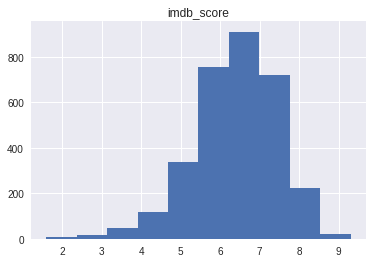

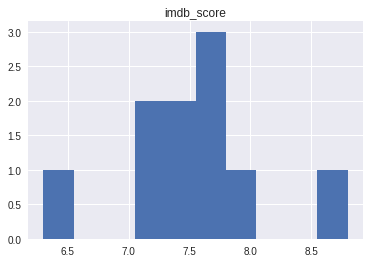

In [35]:
# IMDb rating distribution
data_usa.hist(column='imdb_score')
data_nz.hist(column='imdb_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04eaeb4e48>]],
      dtype=object)

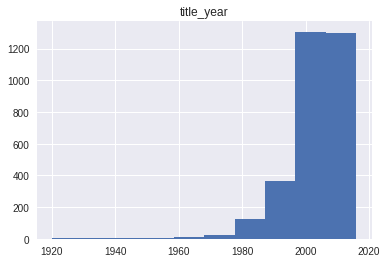

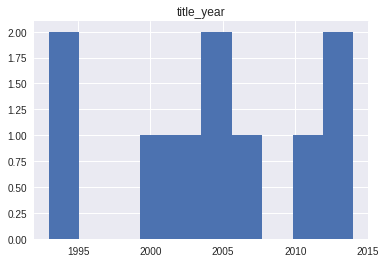

In [36]:
# Movies per year
data_usa.hist(column='title_year')
data_nz.hist(column='title_year')

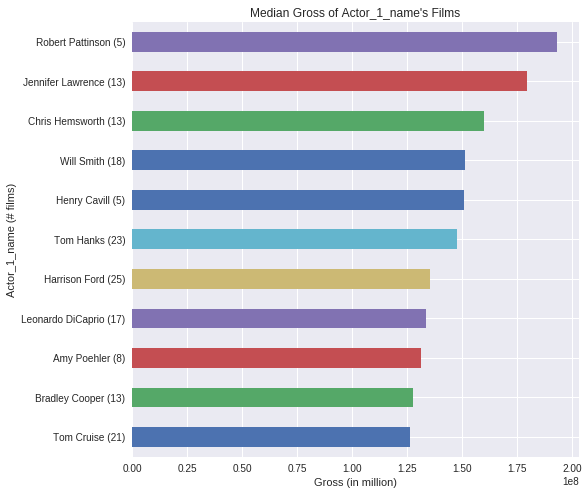

In [40]:
# Median gross box office per actor
fig = plt.figure(figsize=(8,8))
comparison_df = data_usa.groupby('actor_1_name', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_usa['actor_1_name'].value_counts().to_dict()
comparison_df['films'] = comparison_df['actor_1_name'].map(name_count_key)

comparison_df['actor_1_name'] = comparison_df['actor_1_name'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['actor_1_name', 'gross']][10::-1].set_index('actor_1_name').iloc[:,0].plot(kind='barh')
plt.legend().set_visible(False)
plt.title("Median Gross of Actor_1_name's Films")
plt.ylabel("Actor_1_name (# films)")
plt.xlabel("Gross (in million)")

# Experimentally save plot to png
plt.savefig('foo.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


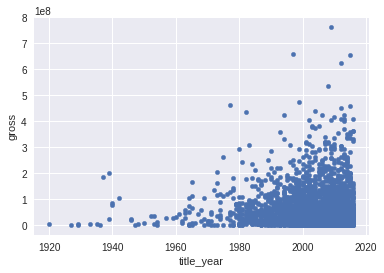

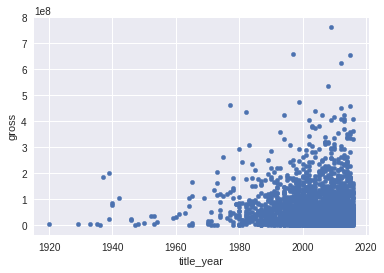

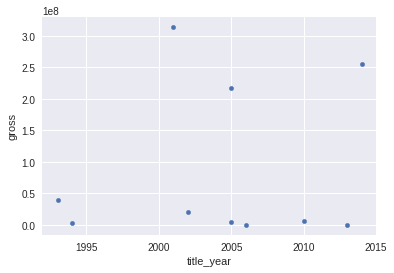

In [43]:
# title year vs gross
data.plot.scatter(x='title_year', y='gross')
data_usa.plot.scatter(x='title_year', y='gross')
data_nz.plot.scatter(x='title_year', y='gross')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


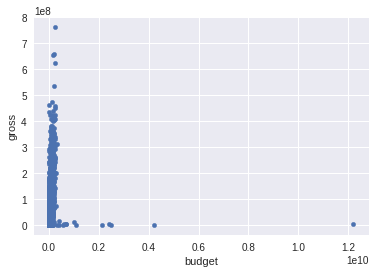

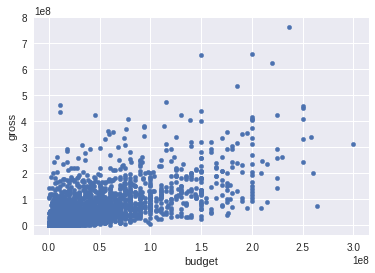

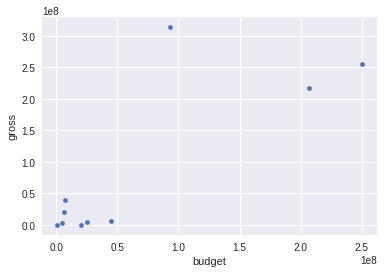

In [44]:
# budget vs gross
data.plot.scatter(x='budget', y='gross')
data_usa.plot.scatter(x='budget', y='gross')
data_nz.plot.scatter(x='budget', y='gross')

In [46]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.00,0.24,0.18,0.25,0.18,0.47,0.60,0.25,-0.03,0.57,0.10,0.37,0.26,0.34,0.24,0.70
duration,0.24,1.00,0.18,0.13,0.09,0.25,0.34,0.13,0.03,0.35,0.07,-0.13,0.13,0.36,0.17,0.22
director_facebook_likes,0.18,0.18,1.00,0.12,0.09,0.14,0.31,0.12,-0.05,0.23,0.02,-0.05,0.12,0.19,0.05,0.17
actor_3_facebook_likes,0.25,0.13,0.12,1.00,0.25,0.29,0.27,0.48,0.10,0.21,0.04,0.10,0.55,0.06,0.07,0.27
actor_1_facebook_likes,0.18,0.09,0.09,0.25,1.00,0.15,0.19,0.95,0.06,0.14,0.02,0.08,0.39,0.09,0.07,0.13
gross,0.47,0.25,0.14,0.29,0.15,1.00,0.64,0.24,-0.03,0.56,0.10,0.02,0.25,0.20,0.13,0.37
num_voted_users,0.60,0.34,0.31,0.27,0.19,0.64,1.00,0.25,-0.03,0.79,0.07,0.00,0.25,0.46,0.14,0.53
cast_total_facebook_likes,0.25,0.13,0.12,0.48,0.95,0.24,0.25,1.00,0.09,0.19,0.03,0.11,0.64,0.10,0.09,0.20
facenumber_in_poster,-0.03,0.03,-0.05,0.10,0.06,-0.03,-0.03,0.09,1.00,-0.07,-0.02,0.06,0.07,-0.08,0.01,0.01
num_user_for_reviews,0.57,0.35,0.23,0.21,0.14,0.56,0.79,0.19,-0.07,1.00,0.07,0.00,0.20,0.31,0.15,0.39


In [47]:
data_usa.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.00,0.28,0.19,0.28,0.18,0.49,0.61,0.25,-0.03,0.58,0.49,0.39,0.28,0.36,0.24,0.70
duration,0.28,1.00,0.21,0.14,0.10,0.29,0.37,0.14,0.01,0.37,0.30,-0.11,0.15,0.38,0.18,0.25
director_facebook_likes,0.19,0.21,1.00,0.13,0.09,0.14,0.32,0.12,-0.05,0.25,0.10,-0.06,0.12,0.22,0.06,0.18
actor_3_facebook_likes,0.28,0.14,0.13,1.00,0.25,0.28,0.27,0.47,0.10,0.22,0.27,0.12,0.54,0.09,0.07,0.30
actor_1_facebook_likes,0.18,0.10,0.09,0.25,1.00,0.13,0.18,0.95,0.06,0.13,0.15,0.09,0.38,0.12,0.07,0.13
gross,0.49,0.29,0.14,0.28,0.13,1.00,0.64,0.22,-0.03,0.56,0.65,0.03,0.24,0.26,0.13,0.38
num_voted_users,0.61,0.37,0.32,0.27,0.18,0.64,1.00,0.25,-0.04,0.79,0.42,0.02,0.25,0.50,0.14,0.53
cast_total_facebook_likes,0.25,0.14,0.12,0.47,0.95,0.22,0.25,1.00,0.08,0.19,0.23,0.12,0.62,0.13,0.09,0.21
facenumber_in_poster,-0.03,0.01,-0.05,0.10,0.06,-0.03,-0.04,0.08,1.00,-0.08,-0.03,0.08,0.07,-0.08,0.01,0.01
num_user_for_reviews,0.58,0.37,0.25,0.22,0.13,0.56,0.79,0.19,-0.08,1.00,0.42,0.02,0.20,0.34,0.15,0.40


In [48]:
data_nz.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.00,0.93,-0.29,0.57,0.31,0.89,0.57,0.43,-0.34,0.63,0.94,0.22,0.46,0.19,0.57,0.62
duration,0.93,1.00,-0.14,0.49,0.45,0.89,0.66,0.54,-0.23,0.75,0.84,0.03,0.57,0.32,0.45,0.46
director_facebook_likes,-0.29,-0.14,1.00,-0.32,-0.24,-0.24,-0.22,-0.28,0.07,-0.24,-0.32,-0.55,-0.26,0.07,-0.43,-0.20
actor_3_facebook_likes,0.57,0.49,-0.32,1.00,0.39,0.77,0.77,0.59,0.14,0.61,0.59,0.29,0.76,0.29,0.46,0.75
actor_1_facebook_likes,0.31,0.45,-0.24,0.39,1.00,0.43,0.61,0.97,0.59,0.59,0.15,-0.36,0.66,0.59,0.57,0.22
gross,0.89,0.89,-0.24,0.77,0.43,1.00,0.86,0.59,-0.08,0.85,0.81,0.14,0.77,0.47,0.40,0.64
num_voted_users,0.57,0.66,-0.22,0.77,0.61,0.86,1.00,0.75,0.33,0.95,0.42,-0.06,0.98,0.69,0.34,0.41
cast_total_facebook_likes,0.43,0.54,-0.28,0.59,0.97,0.59,0.75,1.00,0.54,0.70,0.28,-0.25,0.80,0.63,0.59,0.37
facenumber_in_poster,-0.34,-0.23,0.07,0.14,0.59,-0.08,0.33,0.54,1.00,0.26,-0.52,-0.54,0.44,0.42,0.22,-0.25
num_user_for_reviews,0.63,0.75,-0.24,0.61,0.59,0.85,0.95,0.70,0.26,1.00,0.44,-0.12,0.93,0.62,0.37,0.22


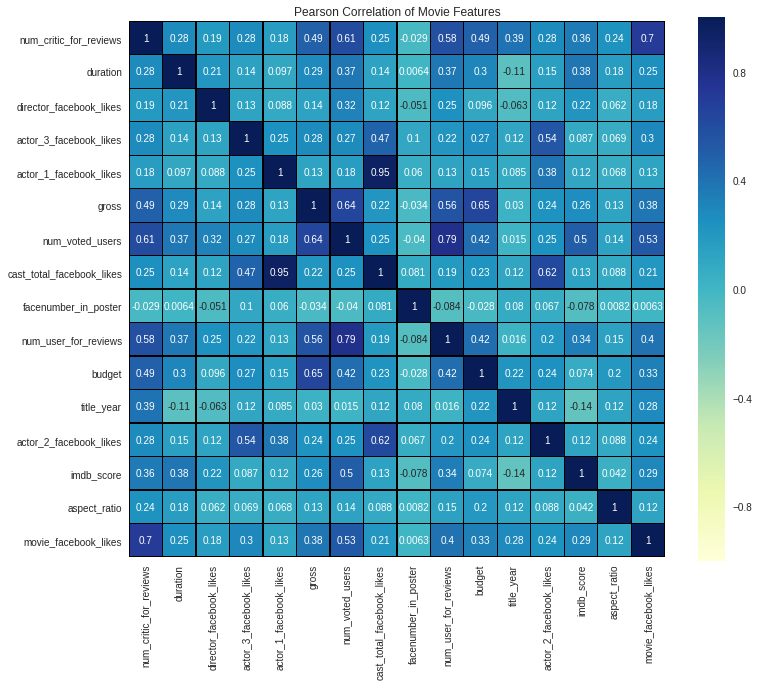

In [0]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

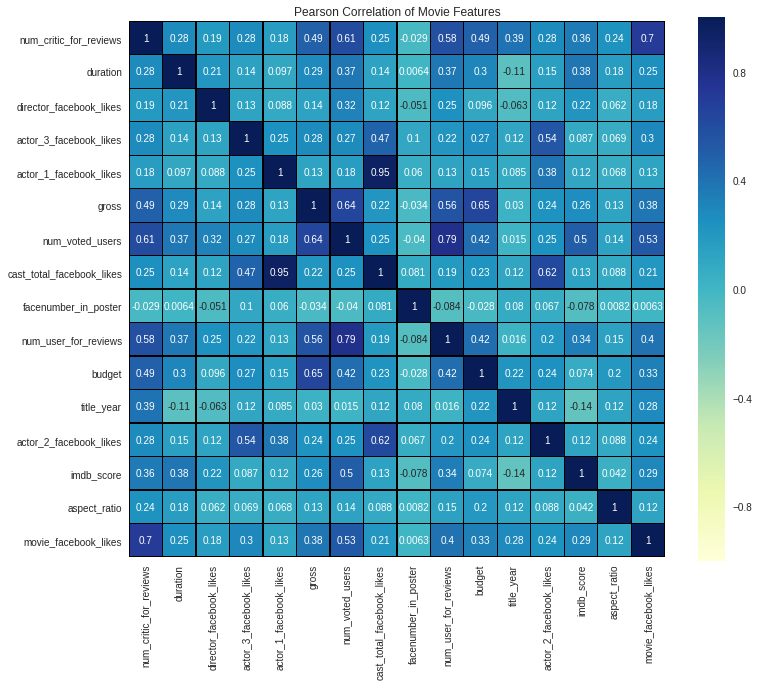

In [49]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(data_usa.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

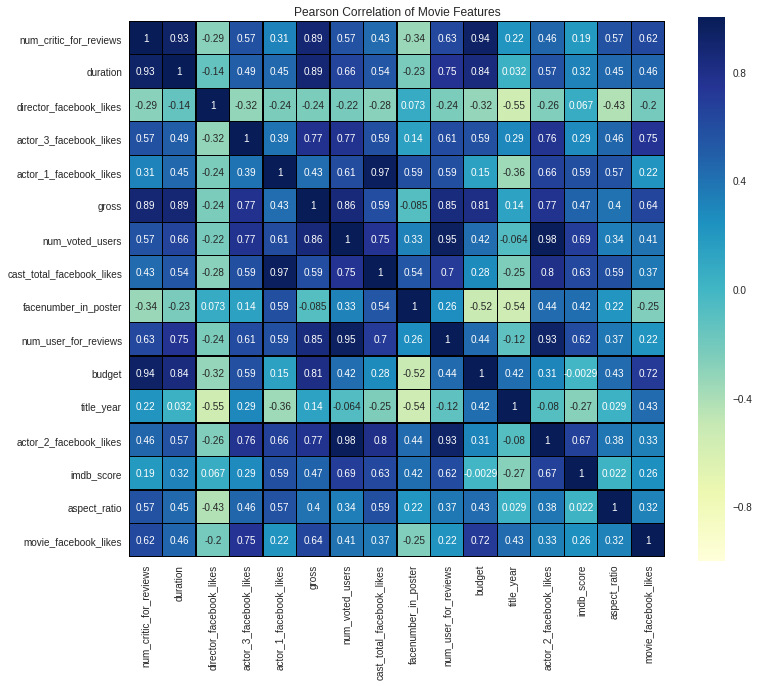

In [50]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(data_nz.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

As we can see from the heatmap, there are regions (features) where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner and bottom right quarter. This is a good sign as it means we may be able to find linearly correlated features for which we can perform PCA projections on.

In [51]:
data.corr()['gross'].sort_values(ascending=False)

gross                        1.00
num_voted_users              0.64
num_user_for_reviews         0.56
num_critic_for_reviews       0.47
movie_facebook_likes         0.37
actor_3_facebook_likes       0.29
actor_2_facebook_likes       0.25
duration                     0.25
cast_total_facebook_likes    0.24
imdb_score                   0.20
actor_1_facebook_likes       0.15
director_facebook_likes      0.14
aspect_ratio                 0.13
budget                       0.10
title_year                   0.02
facenumber_in_poster        -0.03
Name: gross, dtype: float64

In [52]:
data_usa.corr()['gross'].sort_values(ascending=False)

gross                        1.00
budget                       0.65
num_voted_users              0.64
num_user_for_reviews         0.56
num_critic_for_reviews       0.49
movie_facebook_likes         0.38
duration                     0.29
actor_3_facebook_likes       0.28
imdb_score                   0.26
actor_2_facebook_likes       0.24
cast_total_facebook_likes    0.22
director_facebook_likes      0.14
actor_1_facebook_likes       0.13
aspect_ratio                 0.13
title_year                   0.03
facenumber_in_poster        -0.03
Name: gross, dtype: float64

In [53]:
data_nz.corr()['gross'].sort_values(ascending=False)

gross                        1.00
duration                     0.89
num_critic_for_reviews       0.89
num_voted_users              0.86
num_user_for_reviews         0.85
budget                       0.81
actor_3_facebook_likes       0.77
actor_2_facebook_likes       0.77
movie_facebook_likes         0.64
cast_total_facebook_likes    0.59
imdb_score                   0.47
actor_1_facebook_likes       0.43
aspect_ratio                 0.40
title_year                   0.14
facenumber_in_poster        -0.08
director_facebook_likes     -0.24
Name: gross, dtype: float64


The gross box office correlates strongly with num_voted_users, num_users_for_reviews and movie_facebook_likes. But some of those features are also highly correlated among each other (as you can see in the heatmap above).



## Gross Box Office Prediction


### Getting numerical data


In [54]:
numerical_columns = data.dtypes[data.dtypes != 'object'].index
numerical_data = data[numerical_columns]

# we drop aspect_ratio, as it doesn't provide any useful info
numerical_data.drop('aspect_ratio', axis=1, inplace=True)
numerical_data.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.00,178.00,0.00,855.00,"1,000.00","760,505,847.00",886204,4834,0.00,"3,054.00","237,000,000.00","2,009.00",936.00,7.90,33000
1,302.00,169.00,563.00,"1,000.00","40,000.00","309,404,152.00",471220,48350,0.00,"1,238.00","300,000,000.00","2,007.00","5,000.00",7.10,0


In [57]:
numerical_columns_usa = data_usa.dtypes[data_usa.dtypes != 'object'].index
numerical_data_usa = data_usa[numerical_columns_usa]

# we drop aspect_ratio, as it doesn't provide any useful info
numerical_data_usa.drop('aspect_ratio', axis=1, inplace=True)
numerical_data_usa.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.00,178.00,0.00,855.00,"1,000.00","760,505,847.00",886204,4834,0.00,"3,054.00","237,000,000.00","2,009.00",936.00,7.90,33000
1,302.00,169.00,563.00,"1,000.00","40,000.00","309,404,152.00",471220,48350,0.00,"1,238.00","300,000,000.00","2,007.00","5,000.00",7.10,0


In [60]:
numerical_columns_nz = data_nz.dtypes[data_nz.dtypes != 'object'].index
numerical_data_nz = data_nz[numerical_columns_nz]

# we drop aspect_ratio, as it doesn't provide any useful info
numerical_data_nz.drop('aspect_ratio', axis=1, inplace=True)
numerical_data_nz.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
20,422.00,164.00,0.00,773.00,"5,000.00","255,108,370.00",354228,9152,0.00,802.00,"250,000,000.00","2,014.00",972.00,7.50,65000
25,446.00,201.00,0.00,84.00,"6,000.00","218,051,260.00",316018,7123,0.00,"2,618.00","207,000,000.00","2,005.00",919.00,7.20,0


### Preparing train and test datasets

In [0]:
train, test = train_test_split(numerical_data, test_size=0.2)
target_train = train.pop('gross')
target_test = test.pop('gross')

In [63]:
print('Train data: {} / {} = {}'.format(len(train), len(numerical_data), float(len(train)/len(numerical_data))))
print('Test data: {} / {} = {}'.format(len(test), len(numerical_data), float(len(test)/len(numerical_data))))

Train data: 8 / 10 = 0.8
Test data: 2 / 10 = 0.2


### Linear Regression

In [64]:
model = LinearRegression()
model.fit(train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
prediction = model.predict(test)

Mean squared error: 7079836331566388.00
Variance score: 0.38


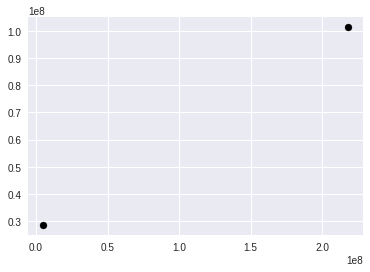

In [66]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, prediction))

# Plot outputs
plt.scatter(target_test, prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

### Random Forest

In [67]:
forest = RandomForestRegressor(
    max_depth=25,
    min_samples_split=15,
    n_estimators=1000,
    random_state=1)

forest.fit(train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [68]:
forest.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
forest_prediction = forest.predict(test)

Mean squared error: 12366416139573312.00
Variance score: -0.09


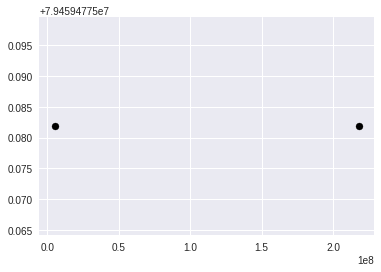

In [70]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, forest_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, forest_prediction))

# Plot outputs
plt.scatter(target_test, forest_prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

## Dropping post-fact data

There are post-fact variables in our data set making the prediction more accurate. Things like `num_voted_users` and `num_user_for_reviews` are after the fact metrics, so probably not as useful for prediction.

In [0]:
train.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
233,168.00,121.00,274.00,157.00,273.00,35066,993,4.00,196.00,"120,000,000.00","2,010.00",216.00,5.30,0
4807,8.00,84.00,0.00,36.00,169.00,191,312,0.00,10.00,"21,000,000.00","2,002.00",80.00,5.80,7


In [0]:
train.drop(['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 'movie_facebook_likes'], axis=1, inplace=True)
test.drop(['num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 'movie_facebook_likes'], axis=1, inplace=True)
train.head(2)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes
233,121.00,274.00,157.00,273.00,993,4.00,"120,000,000.00","2,010.00",216.00
4807,84.00,0.00,36.00,169.00,312,0.00,"21,000,000.00","2,002.00",80.00


In [0]:
pre_data_forest = RandomForestRegressor(
    max_depth=25,
    min_samples_split=15,
    n_estimators=1000,
    random_state=1)

pre_data_forest.fit(train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
second_prediction = pre_data_forest.predict(test)

Mean squared error: 2953103718836269.50
Variance score: 0.48


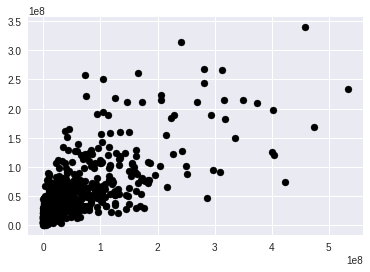

In [0]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, second_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, second_prediction))

# Plot outputs
plt.scatter(target_test, second_prediction,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

## Over/Under performing movies

In [0]:
numerical_data_target = numerical_data.pop('gross')
all_data_prediction = forest.predict(numerical_data)

In [0]:
performance_df = data.copy()

performance_df["prediction"] = all_data_prediction
performance_df["performance_diff"] = numerical_data_target - all_data_prediction

performance_df.sort_values(['performance_diff'], ascending=False, inplace=True)

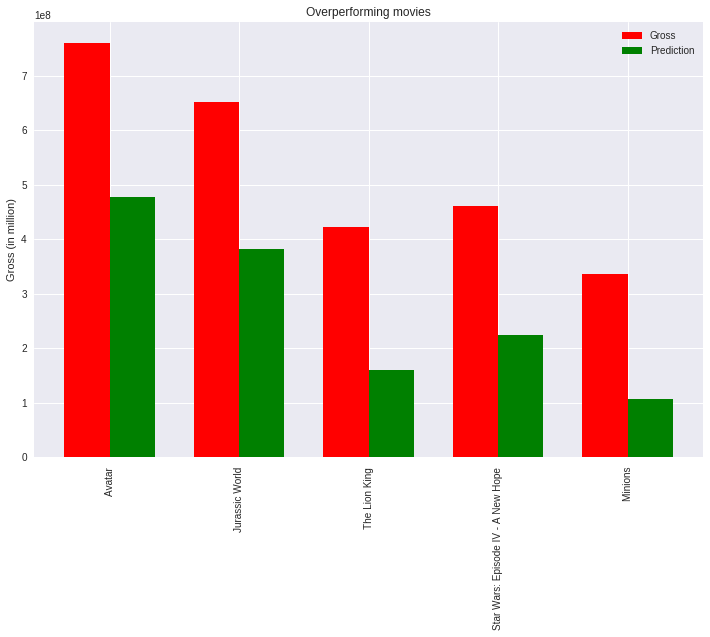

In [0]:
ind = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

gross = ax.bar(ind, performance_df.gross[:5], width, color='r')
predicted_gross = ax.bar(ind + width, performance_df.prediction[:5], width, color='g')

plt.title("Overperforming movies")
plt.ylabel("Gross (in million)")

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(performance_df.movie_title[:5], rotation='vertical')
ax.legend((gross[0], predicted_gross[0]), ('Gross', 'Prediction'))

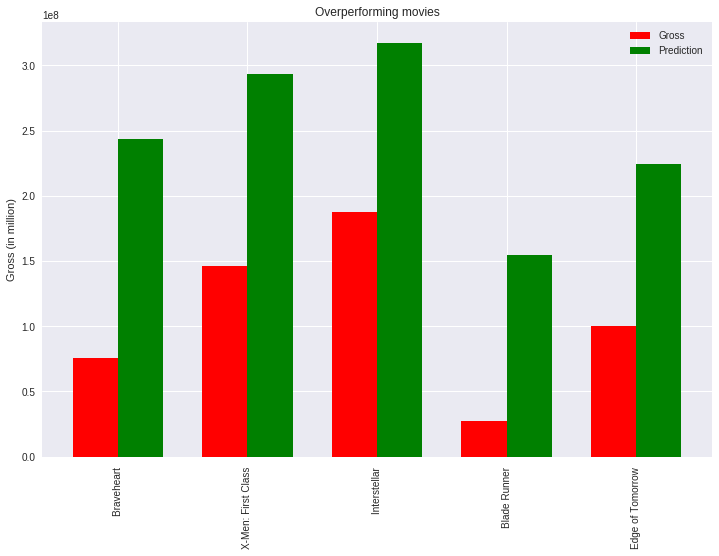

In [0]:


ind = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

gross = ax.bar(ind, performance_df.gross[:-6:-1], width, color='r')
predicted_gross = ax.bar(ind + width, performance_df.prediction[:-6:-1], width, color='g')

plt.title("Overperforming movies")
plt.ylabel("Gross (in million)")

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(performance_df.movie_title[:-6:-1], rotation='vertical')
ax.legend((gross[0], predicted_gross[0]), ('Gross', 'Prediction'))